In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from pydataset import data
from scipy import stats

### #1 In a jupyter notebook, classification_exercises.ipynb, use a python module (pydata or seaborn datasets) containing datasets as a source from the iris data. Create a pandas dataframe, df_iris, from this data.

- print the first 3 rows
- print the number of rows and columns (shape)
- print the column names
- print the data type of each column
- print the summary statistics for each of the numeric variables. Would you recommend rescaling the data based on these statistics?

In [2]:
df_iris=data('iris')

In [3]:
#can also use seaborn to load
df_iris_seaborn=sns.load_dataset('iris')

In [4]:
#print the first 3 rows
df_iris.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


In [5]:
#print the number of rows and columns (shape)
df_iris.shape

(150, 5)

In [6]:
#print the column names
df_iris.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

In [7]:
#turn it into a list
df_iris.columns.to_list()

['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width', 'Species']

In [8]:
#print the data type of each column
#can also use .dyptes
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [9]:
#print the summary statistics for each of the numeric variables. 
df_iris.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#Would you recommend rescaling the data based on these statistics?
- not in this case. it is all in mm and range is not large

In [10]:
#can transcribe to make easier to read
df_iris.describe().T

,count,mean,std,min,25%,50%,75%,max
Sepal.Length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
Sepal.Width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
Petal.Length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
Petal.Width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


_______

### #2 Read the Table1_CustDetails table from the Excel_Exercises.xlsx file into a dataframe named df_excel.

- assign the first 100 rows to a new dataframe, df_excel_sample
- print the number of rows of your original dataframe
- print the first 5 column names
- print the column names that have a data type of object
- compute the range for each of the numeric variables.

In [11]:
df_excel = pd.read_excel('Excel_Exercises.xlsx', sheet_name='Table1_CustDetails')

In [12]:
df_excel.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,65.6,593.30,No
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,59.9,542.40,No
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,73.9,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,98.0,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,83.9,267.40,Yes


In [13]:
# assign the first 100 rows to a new dataframe, df_excel_sample
df_excel_sample = df_excel.head(100)

In [14]:
# print the number of rows of your original dataframe
df_excel.shape[0]

7049

In [15]:
# print the first 5 column names
df_excel.columns[:5]

Index(['customer_id', 'gender', 'is_senior_citizen', 'partner', 'dependents'], dtype='object')

In [16]:
# print the column names that have a data type of object
df_excel.dtypes

customer_id           object
gender                object
is_senior_citizen      int64
partner               object
dependents            object
phone_service          int64
internet_service       int64
contract_type          int64
payment_type          object
monthly_charges      float64
total_charges        float64
churn                 object
dtype: object

In [17]:
list(df_excel.select_dtypes(['object']).columns)

['customer_id', 'gender', 'partner', 'dependents', 'payment_type', 'churn']

In [18]:
# compute the range for each of the numeric variables.
#step 1 create new variable with ONLY numeric values
excel_range = df_excel.select_dtypes(include=[np.number])
list(excel_range)

['is_senior_citizen',
 'phone_service',
 'internet_service',
 'contract_type',
 'monthly_charges',
 'total_charges']

In [19]:
#can also get range of specific columns
df_excel[['monthly_charges', 'total_charges']].describe()

,monthly_charges,total_charges
count,7049.000000,7038.000000
mean,64.747014,2283.043883
std,30.099460,2266.521984
min,18.250000,18.800000
25%,35.450000,401.587500
50%,70.350000,1397.100000
75%,89.850000,3793.775000
max,118.750000,8684.800000


In [20]:
#step 2 get max and min to get range
numeric_ranges = excel_range.max()- excel_range.min()
numeric_ranges

is_senior_citizen       1.0
phone_service           2.0
internet_service        2.0
contract_type           2.0
monthly_charges       100.5
total_charges        8666.0
dtype: float64

_______

### #3 Read the data from this google sheet into a dataframe, df_google

- print the first 3 rows
- print the number of rows and columns
- print the column names
- print the data type of each column
- print the summary statistics for each of the numeric variables
- print the unique values for each of your categorical variables

In [21]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'
csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
df_google = pd.read_csv(csv_export_url)

In [22]:
#print the first 3 rows
df_google.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [23]:
#print the number of rows and columns
df_google.shape

(891, 12)

In [24]:
#print the column names
df_google.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [25]:
#put it into a list- easier to read
df_google.columns.to_list()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [26]:
#print the data type of each column
df_google.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [27]:
# print the summary statistics for each of the numeric variables
df_google.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [28]:
# print the unique values for each of your categorical variables
list(df_excel.select_dtypes(['object']).columns)

['customer_id', 'gender', 'partner', 'dependents', 'payment_type', 'churn']

In [29]:
df_google.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [30]:
df_google.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [31]:
#df_google['Name'].unique()

In [32]:
#This will give you the breakdown of each column
#dropna = False- will show if you have nulls
df_google.Pclass.value_counts(dropna=False)

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [33]:
df_google.Embarked.value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [34]:
df_google.Cabin.value_counts(dropna=False)

NaN                687
C23 C25 C27          4
B96 B98              4
G6                   4
F33                  3
E101                 3
F2                   3
D                    3
C22 C26              3
B18                  2
C68                  2
D20                  2
E67                  2
D26                  2
C83                  2
E8                   2
D17                  2
F4                   2
C126                 2
B20                  2
B57 B59 B63 B66      2
E33                  2
C92                  2
F G73                2
B22                  2
C65                  2
E24                  2
E121                 2
E25                  2
C124                 2
C52                  2
B58 B60              2
C123                 2
E44                  2
B5                   2
B35                  2
C93                  2
B49                  2
C2                   2
D33                  2
D36                  2
B77                  2
B51 B53 B55          2
D35        

In [35]:
df_google.Ticket.value_counts(dropna=False)

347082      7
1601        7
CA. 2343    7
3101295     6
347088      6
           ..
PC 17585    1
315096      1
349213      1
2674        1
349224      1
Name: Ticket, Length: 681, dtype: int64

In [36]:
df_google.Sex.value_counts(dropna=False)

male      577
female    314
Name: Sex, dtype: int64

_______

# Exercises- Prepare.py (May 14)

The end product of this exercise should be the specified functions in a python script named prepare.py. Do these in your classification_exercises.ipynb first, then transfer to the prepare.py file.

This work should all be saved in your local classification-exercises repo. Then add, commit, and push your changes.

Using the Iris Data:

a. Use the function defined in acquire.py to load the iris data.

b. Drop the species_id and measurement_id columns.

c. Rename the species_name column to just species.

d. Create dummy variables of the species name.

e. Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.

### a. Use the function defined in acquire.py to load the iris data

In [37]:
from acquire import get_iris_data

In [38]:
get_iris_data()

,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_id,species_id,species_name
0,1,5.1,3.5,1.4,0.2,1,1,setosa
1,2,4.9,3.0,1.4,0.2,1,1,setosa
2,3,4.7,3.2,1.3,0.2,1,1,setosa
3,4,4.6,3.1,1.5,0.2,1,1,setosa
4,5,5.0,3.6,1.4,0.2,1,1,setosa
5,6,5.4,3.9,1.7,0.4,1,1,setosa
6,7,4.6,3.4,1.4,0.3,1,1,setosa
7,8,5.0,3.4,1.5,0.2,1,1,setosa
8,9,4.4,2.9,1.4,0.2,1,1,setosa
9,10,4.9,3.1,1.5,0.1,1,1,setosa


In [39]:
get_iris_data().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   measurement_id  150 non-null    int64  
 1   sepal_length    150 non-null    float64
 2   sepal_width     150 non-null    float64
 3   petal_length    150 non-null    float64
 4   petal_width     150 non-null    float64
 5   species_id      150 non-null    int64  
 6   species_id      150 non-null    int64  
 7   species_name    150 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 9.5+ KB


### b. Drop the species_id and measurement_id columns.

In [40]:
columns_to_drop = ['species_id', 'measurement_id']

In [41]:
cleaning_iris_data = get_iris_data().drop(columns=columns_to_drop)

In [42]:
cleaning_iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species_name
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### c. Rename the species_name column to just species.

In [43]:
cleaning_iris_data = cleaning_iris_data.rename(columns = {'species_name': 'species'})

In [44]:
cleaning_iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### d. Create dummy variables of the species name.

In [45]:
dummy_name = pd.get_dummies(cleaning_iris_data[['species']], dummy_na = False, drop_first=[True])

In [46]:
#changes names to numeric dtype
dummy_name.head()

,species_versicolor,species_virginica
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [47]:
cleaning_iris_data = pd.concat([cleaning_iris_data, dummy_name], axis=1)

In [48]:
cleaning_iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,setosa,0,0
1,4.9,3.0,1.4,0.2,setosa,0,0
2,4.7,3.2,1.3,0.2,setosa,0,0
3,4.6,3.1,1.5,0.2,setosa,0,0
4,5.0,3.6,1.4,0.2,setosa,0,0


### e. Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.

In [49]:
def prep_iris(df):
    '''
    accepts the untrasformed iris data
    returns: the data with cleaning operations performed on it 
    '''
    df = df.drop(columns= (['species_id', 'measurement_id']))
    df = df.rename(columns = {'species_name': 'species'})
    dummy_name = pd.get_dummies(df[['species']], dummy_na = False, drop_first=[True])
    df = pd.concat([df, dummy_name], axis=1)
    return df

_____________________________

# Exercises (May 18)

## Exploratory Analysis

Section 1 - iris_db: Using iris data from our mySQL server and the methods used in the lesson above:

1. **Acquire, prepare & split your data.**

2. **Univariate Stats**

    - **a**. For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).

    - **b**. For each species (categorical variable): create a frequency table and a bar plot of those frequencies.

    - **c**. Document takeaways & any actions.

3. **Bivariate Stats**

    - **a**. Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).
    
    - **b**. For each measurement type, compute the descriptive statistics for each species.

    - **c**. For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.

    - **d**. Document takeaways & any actions.

4. **Multivariate Stats**

    - **a**. Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent species.

    - **b**. Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

    - **c**. Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared to setosa? Answer the question through both a plot and using a mann-whitney or t-test. If you use a t-test, be sure assumptions are met (independence, normality, equal variance).

    - **d**. Document takeaways and any actions.

### #1. Acquire, prepare & split your data.

In [50]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pydataset import data
from acquire import get_connection, get_iris_data
from sklearn.model_selection import train_test_split

In [51]:
#this data has both tables in it (measure and species with a join)
iris = get_iris_data()
iris.head()

,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_id,species_id,species_name
0,1,5.1,3.5,1.4,0.2,1,1,setosa
1,2,4.9,3.0,1.4,0.2,1,1,setosa
2,3,4.7,3.2,1.3,0.2,1,1,setosa
3,4,4.6,3.1,1.5,0.2,1,1,setosa
4,5,5.0,3.6,1.4,0.2,1,1,setosa


In [52]:
#show all column names
iris.columns

Index(['measurement_id', 'sepal_length', 'sepal_width', 'petal_length',
       'petal_width', 'species_id', 'species_id', 'species_name'],
      dtype='object')

In [97]:
#drop columns that are not needed
iris=iris.drop(columns=['species_id', 'measurement_id'])

In [98]:
#shows columns dropped
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species_name
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [102]:
#split data using sklearn import

train_and_validate, test = train_test_split(iris,test_size=.15,random_state=123)

train, validate = train_test_split(train_and_validate,test_size=.15,random_state=123)

In [ ]:
##Madeline example
#80/20 train test split
#train, test= train_test_split(iris, train_size=0.8, random_stat=1349, stratify=iris.species)

#70/30 train validata split
#train, validate= train_test_split(train, train_size=0.7, random_stat=1349, stratify=iris.species)


In [99]:
#this is the size of the entire data set
iris.shape

(150, 5)

In [100]:
#this is the size of the train data set
train.shape, train.info()
#107 data points in test set

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107 entries, 67 to 109
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  107 non-null    float64
 1   sepal_width   107 non-null    float64
 2   petal_length  107 non-null    float64
 3   petal_width   107 non-null    float64
 4   species_name  107 non-null    object 
dtypes: float64(4), object(1)
memory usage: 10.0+ KB


((107, 5), None)

In [101]:
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species_name
67,5.8,2.7,4.1,1.0,versicolor
105,7.6,3.0,6.6,2.1,virginica
91,6.1,3.0,4.6,1.4,versicolor
50,7.0,3.2,4.7,1.4,versicolor
98,5.1,2.5,3.0,1.1,versicolor


In [90]:
#this is the size of the validate data set
validate.shape, validate.info()
#20 data points in test set

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 121 to 6
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   measurement_id  20 non-null     int64  
 1   sepal_length    20 non-null     float64
 2   sepal_width     20 non-null     float64
 3   petal_length    20 non-null     float64
 4   petal_width     20 non-null     float64
 5   species_id      20 non-null     int64  
 6   species_name    20 non-null     object 
dtypes: float64(4), int64(2), object(1)
memory usage: 1.2+ KB


((20, 7), None)

In [64]:
#this is the size of the test data set
test.shape, test.info()
#23 data points in test set

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 72 to 24
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   measurement_id  23 non-null     int64  
 1   sepal_length    23 non-null     float64
 2   sepal_width     23 non-null     float64
 3   petal_length    23 non-null     float64
 4   petal_width     23 non-null     float64
 5   species_id      23 non-null     int64  
 6   species_name    23 non-null     object 
dtypes: float64(4), int64(2), object(1)
memory usage: 1.4+ KB


((23, 7), None)

In [92]:
#melt
melt = train.melt(id_vars='species_name')
melt

,species_name,variable,value
0,versicolor,sepal_length,5.8
1,virginica,sepal_length,7.6
2,versicolor,sepal_length,6.1
3,versicolor,sepal_length,7.0
4,versicolor,sepal_length,5.1
...,...,...,...
423,virginica,petal_width,1.8
424,versicolor,petal_width,1.3
425,versicolor,petal_width,1.8
426,versicolor,petal_width,1.5


___________

### #2. Univariate Stats

### 2a. For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).

In [ ]:
#teacher walkthrough- keep font and figure size standard throughout the notebook by using:
plt.rc('font', size=14) 
plt.rc('figure', figsize=(14,7))

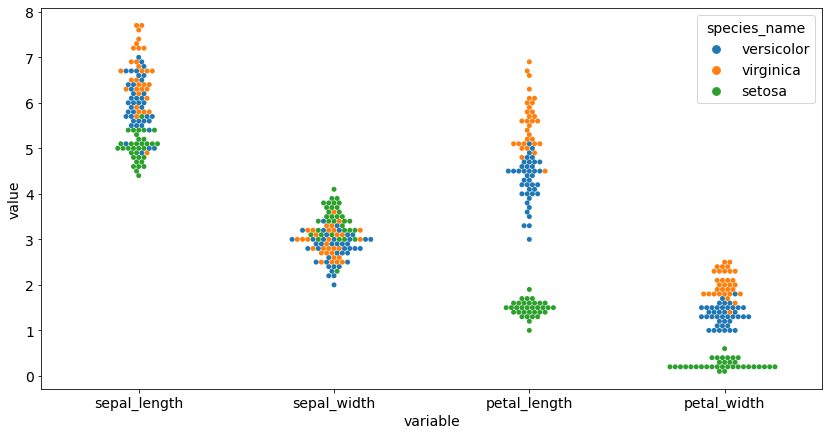

In [109]:
sns.swarmplot(x='variable', y='value', hue= 'species_name', data=melt)
plt.show()

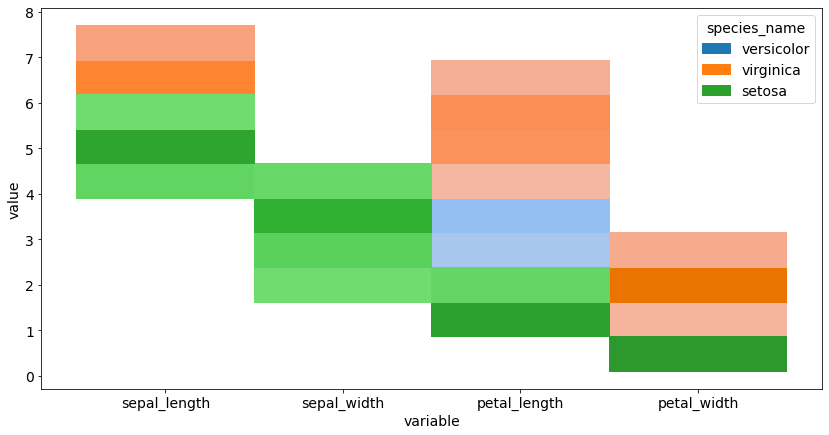

In [107]:
sns.histplot(x='variable', y='value', hue= 'species_name', data=melt)
plt.show()

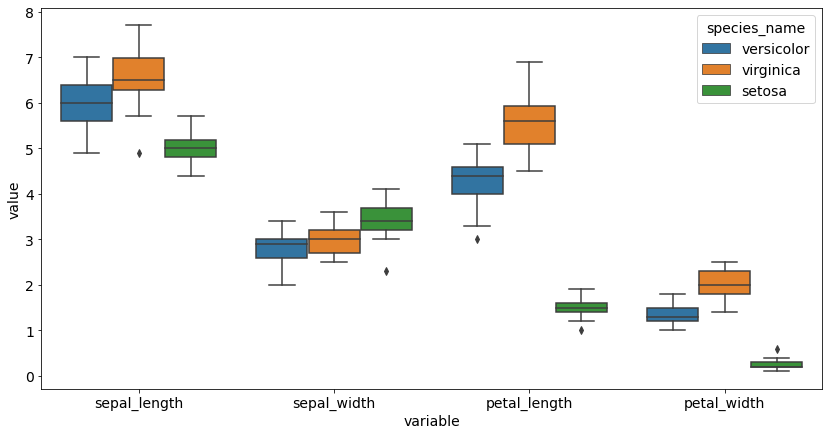

In [108]:
sns.boxplot(x='variable', y='value', hue= 'species_name', data=melt)
plt.show()

In [69]:
train.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,107.000000,107.000000,107.000000,107.000000
mean,5.845794,3.038318,3.774766,1.199065
std,0.804384,0.417234,1.717012,0.738496
min,4.400000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.350000
50%,5.800000,3.000000,4.300000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.700000,4.100000,6.900000,2.500000


##### Takeaways:
   - petal length and width have most seperation between species
   - virginica has the longest and widest petals

### 2b. For each species (categorical variable): create a frequency table and a bar plot of those frequencies.

In [70]:
#frequency table
train.value_counts().head()

sepal_length  sepal_width  petal_length  petal_width  species_name
5.8           2.7          5.1           1.9          virginica       2
7.7           2.8          6.7           2.0          virginica       1
5.4           3.9          1.7           0.4          setosa          1
5.1           3.8          1.6           0.2          setosa          1
                           1.9           0.4          setosa          1
dtype: int64

### 2c. Document takeaways & any actions.

In [71]:
train.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.161847,0.873929,0.806201
sepal_width,-0.161847,1.000000,-0.447030,-0.378925
petal_length,0.873929,-0.447030,1.000000,0.958996
petal_width,0.806201,-0.378925,0.958996,1.000000


<AxesSubplot:xlabel='species_name'>

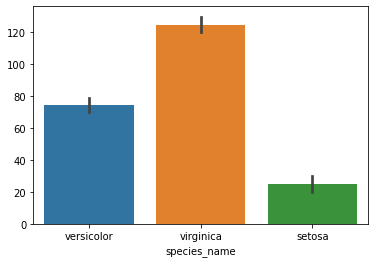

In [72]:
sns.barplot(x=train.species_name, y=train.index)

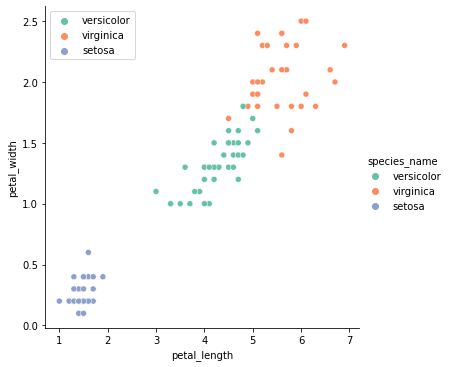

In [73]:
#the table above shows that there is greatest correlation between petal length and petal width
sns.relplot(x='petal_length', y='petal_width', data=train, hue='species_name', palette='Set2')
plt.legend()
plt.show()

___________________________

### #3 Bivariate Stats

### 3a. Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).

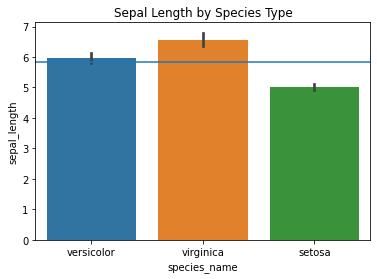

In [74]:
sns.barplot(data=train, x='species_name', y='sepal_length')
plt.axhline(y=train.sepal_length.mean())
plt.title('Sepal Length by Species Type')
plt.show()

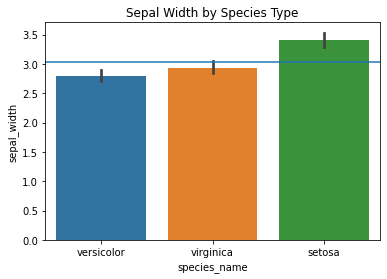

In [75]:
sns.barplot(data=train, x='species_name', y='sepal_width')
plt.axhline(y=train.sepal_width.mean())
plt.title('Sepal Width by Species Type')
plt.show()

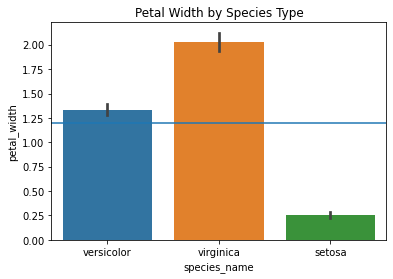

In [76]:
sns.barplot(data=train, x='species_name', y='petal_width')
plt.axhline(y=train.petal_width.mean())
plt.title('Petal Width by Species Type')
plt.show()

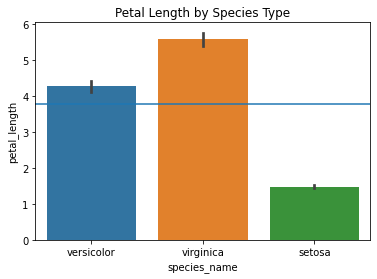

In [77]:
sns.barplot(data=train, x='species_name', y='petal_length')
plt.axhline(y=train.petal_length.mean())
plt.title('Petal Length by Species Type')
plt.show()

### 3b. For each measurement type, compute the descriptive statistics for each species.

In [78]:
train[train.species_name=='virginica'].describe()

,sepal_length,sepal_width,petal_length,petal_width
count,32.000000,32.000000,32.000000,32.000000
mean,6.571875,2.940625,5.571875,2.031250
std,0.644698,0.290560,0.572056,0.276426
min,4.900000,2.500000,4.500000,1.400000
25%,6.275000,2.700000,5.100000,1.800000
50%,6.500000,3.000000,5.600000,2.000000
75%,6.975000,3.200000,5.925000,2.300000
max,7.700000,3.600000,6.900000,2.500000


In [79]:
train[train.species_name=='virginica'].describe()

,sepal_length,sepal_width,petal_length,petal_width
count,32.000000,32.000000,32.000000,32.000000
mean,6.571875,2.940625,5.571875,2.031250
std,0.644698,0.290560,0.572056,0.276426
min,4.900000,2.500000,4.500000,1.400000
25%,6.275000,2.700000,5.100000,1.800000
50%,6.500000,3.000000,5.600000,2.000000
75%,6.975000,3.200000,5.925000,2.300000
max,7.700000,3.600000,6.900000,2.500000


In [80]:
train[train.species_name=='versicolor'].describe()

,sepal_length,sepal_width,petal_length,petal_width
count,41.000000,41.000000,41.000000,41.000000
mean,5.970732,2.802439,4.273171,1.334146
std,0.538630,0.321316,0.480637,0.208098
min,4.900000,2.000000,3.000000,1.000000
25%,5.600000,2.600000,4.000000,1.200000
50%,6.000000,2.900000,4.400000,1.300000
75%,6.400000,3.000000,4.600000,1.500000
max,7.000000,3.400000,5.100000,1.800000


In [81]:
train[train.species_name=='setosa'].describe()

,sepal_length,sepal_width,petal_length,petal_width
count,34.000000,34.000000,34.000000,34.000000
mean,5.011765,3.414706,1.482353,0.252941
std,0.298242,0.361086,0.166006,0.105127
min,4.400000,2.300000,1.000000,0.100000
25%,4.800000,3.200000,1.400000,0.200000
50%,5.000000,3.400000,1.500000,0.200000
75%,5.175000,3.700000,1.600000,0.300000
max,5.700000,4.100000,1.900000,0.600000


### 3c. For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.

In [82]:
#this is mean petal width for virginica
train[train.species_name=='virginica'].petal_width.mean()

2.031249999999999

In [83]:
#this is mean petal width for versiolor
train[train.species_name=='versicolor'].petal_width.mean()

1.3341463414634145

In [84]:
#MannWhitney for petal width in Virginica vs Versicolor
s,p= stats.mannwhitneyu(train[train.species_name=='virginica'].petal_width, train[train.species_name=='versicolor'].petal_width)
s,p

(25.0, 9.786192636318041e-13)

In [85]:
#MannWhitney for petal length in Virginica vs Versicolor
s,p= stats.mannwhitneyu(train[train.species_name=='virginica'].petal_length, train[train.species_name=='versicolor'].petal_length)
s,p

(27.5, 1.3591439783594362e-12)

In [86]:
#MannWhitney for sepal width in Virginica vs Versicolor
s,p= stats.mannwhitneyu(train[train.species_name=='virginica'].sepal_width, train[train.species_name=='versicolor'].sepal_width)
s,p

(512.5, 0.05485122895288755)

In [87]:
#MannWhitney for sepal length in Virginica vs Versicolor
s,p= stats.mannwhitneyu(train[train.species_name=='virginica'].sepal_length, train[train.species_name=='versicolor'].sepal_length)
s,p

(306.5, 5.098353396455423e-05)

### 3d. Document takeaways & any actions.

In [88]:
# sepal width is the least different. so it would not be a good measurement type to use

_____________________

### 4. Multivariate Stats

### 4a. Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent species.

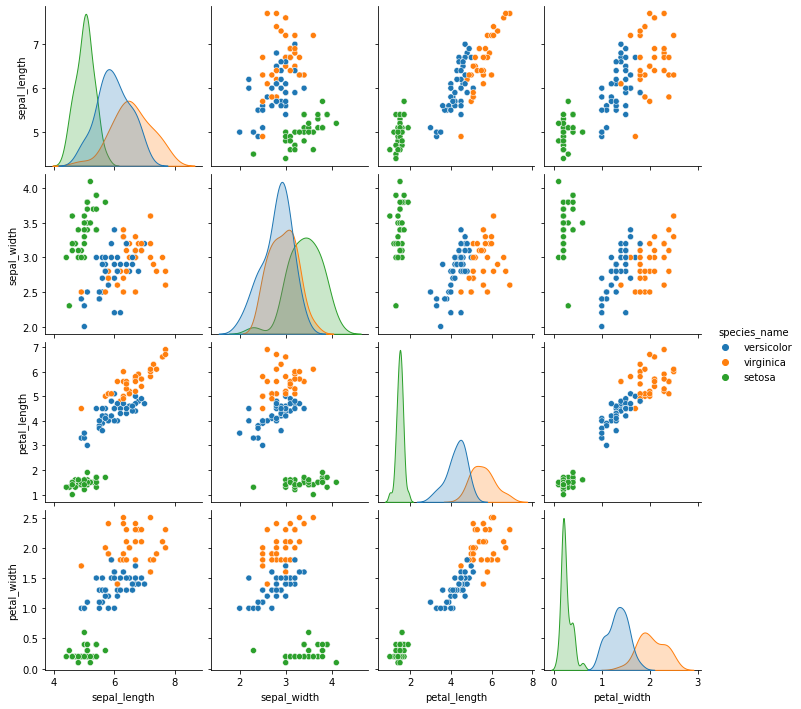

In [93]:
sns.pairplot(data=train, hue='species_name')

### 4b. Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

In [94]:
melted_train=pd.melt(train, id_vars='species_name')
melted_train.head()

,species_name,variable,value
0,versicolor,sepal_length,5.8
1,virginica,sepal_length,7.6
2,versicolor,sepal_length,6.1
3,versicolor,sepal_length,7.0
4,versicolor,sepal_length,5.1


/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 7.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


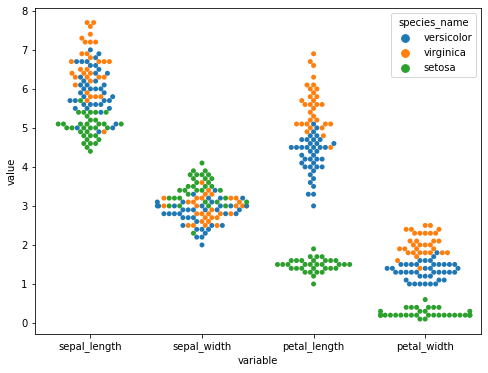

In [95]:
plt.figure(figsize=(8,6))
p= sns.swarmplot(
x='variable',
y='value',
hue='species_name',
data=melted_train)

### 4c. Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared to setosa? Answer the question through both a plot and using a mann-whitney or t-test. If you use a t-test, be sure assumptions are met (independence, normality, equal variance).

In [ ]:
#- is the petal area signficantly different in virginica compared to versicolor

In [ ]:
#create new column that is train
train['petal_area'] = train.petal_length * train.petal_width

In [ ]:
train.head()

### 4d. Document takeaways and any actions.

In [ ]:
s,p= stats.mannwhitneyu(train[train.species_name=='virginica'].petal_area, train[train.species_name=='versicolor'].petal_area)
s,p

 We reject the $H_0$. There is evidence to suggest that petal area between virginica and versicolor are the same


In [ ]:
sns.relplot(data=train, x='species_name', y='petal_area', hue='species_name')
plt.show()

In [ ]:
#same plot as above but excludes setosa.
no_setosa= train[train.species_name!='setosa']
sns.relplot(data=no_setosa, x='species_name', y='petal_area', hue='species_name')
plt.show()

__________________________

# Extra Exercises:
## Teacher Walkthrough

create 4 subplots of scatterplots
- sepal_length* sepal_width
- petal_length* petal_width
- sepal_area * petal_area
- sepal_length * petal_length

In [112]:
#create columns for sepal are and petal area
train['sepal_area'] = train.sepal_length * train.sepal_width
#train['petal_area'] = train.petal_length * train.petal_width <-- this row did not run because I already create it above

<ipython-input-112-c69a39bfb597>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['sepal_area'] = train.sepal_length * train.sepal_width


In [113]:
#this shows that both sepal area and petal area columns have been added
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species_name,sepal_area,petal_area
67,5.8,2.7,4.1,1.0,versicolor,15.66,4.10
105,7.6,3.0,6.6,2.1,virginica,22.80,13.86
91,6.1,3.0,4.6,1.4,versicolor,18.30,6.44
50,7.0,3.2,4.7,1.4,versicolor,22.40,6.58
98,5.1,2.5,3.0,1.1,versicolor,12.75,3.30


In [134]:
#create the combos of subplots you want to see for 'for loop' in later code
combos = [
    ('sepal_length', 'sepal_width'),
     ('petal_length', 'petal_width'),
     ('sepal_area', 'petal_area'),
     ('sepal_length', 'petal_length')
]

In [117]:
#this groups species and returns the total sepal area for that species
train.groupby('species_name')['sepal_area'].sum()

species_name
setosa        584.32
versicolor    690.11
virginica     620.28
Name: sepal_area, dtype: float64

In [135]:
xtest= combos[0][0]
ytest= combos [0][1]

#define the function for scatter plot
def scatter_species(x,y):
    for species_name, subset in train.groupby('species_name'):
        plt.scatter(subset[x], subset[y], label= species_name)
        plt.xlabel(x)
        plt.ylabel(y)
        plt.legend()

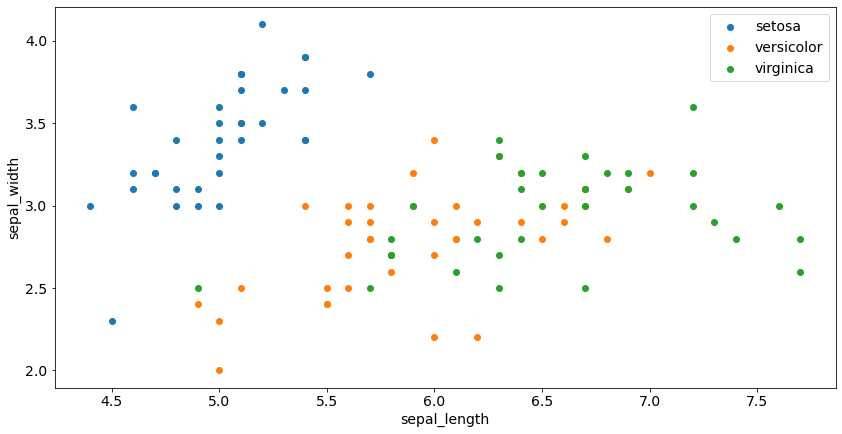

In [126]:
scatter_species(xtest,ytest)

In [136]:
#create with a loop
for i, pair in enumerate(combos):
    print(i)
    print(pair)

0
('sepal_length', 'sepal_width')
1
('petal_length', 'petal_width')
2
('sepal_area', 'petal_area')
3
('sepal_length', 'petal_length')


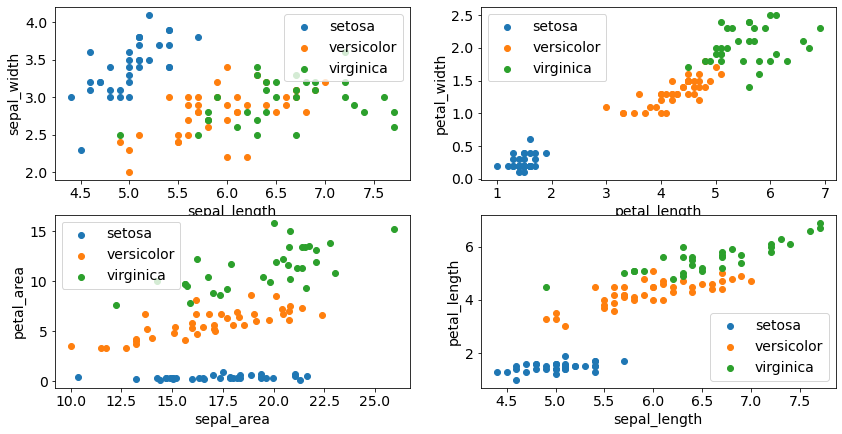

In [137]:
#create subplot manually
plt.subplot(2,2,1)
scatter_species(combos[0][0], combos[0][1])

plt.subplot(2,2,2)
scatter_species(combos[1][0], combos[1][1])

plt.subplot(2,2,3)
scatter_species(combos[2][0], combos[2][1])

plt.subplot(2,2,4)
scatter_species(combos[3][0], combos[3][1])

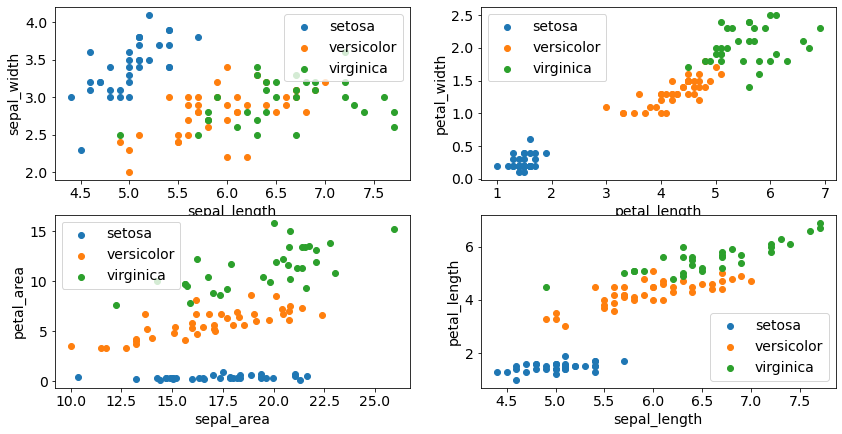

In [138]:
#create the same subplots using a 'for loop' instead
for i, pair in enumerate(combos):
    plt.subplot(2,2,i+1)
    scatter_species(pair[0],pair[1])